  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7661 - loss: 0.5906 - val_accuracy: 0.8689 - val_loss: 0.3040
Epoch 2/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8857 - loss: 0.2844 - val_accuracy: 0.9020 - val_loss: 0.2096
Epoch 3/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9168 - loss: 0.2098 - val_accuracy: 0.9366 - val_loss: 0.1644
Epoch 4/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9290 - loss: 0.1646 - val_accuracy: 0.9496 - val_loss: 0.1404
Epoch 5/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9324 - loss: 0.1504 - val_accuracy: 0.9597 - val_loss: 0.1202
Epoch 6/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9433 - loss: 0.1389 - val_accuracy: 0.9611 - val_loss: 0.1205
Epoch 7/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9523 - loss: 0.1234 - val_accuracy: 0.9741 - val_loss: 0.0977
Epoch 8/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9522 - loss: 0.1144 - val_accuracy: 0.

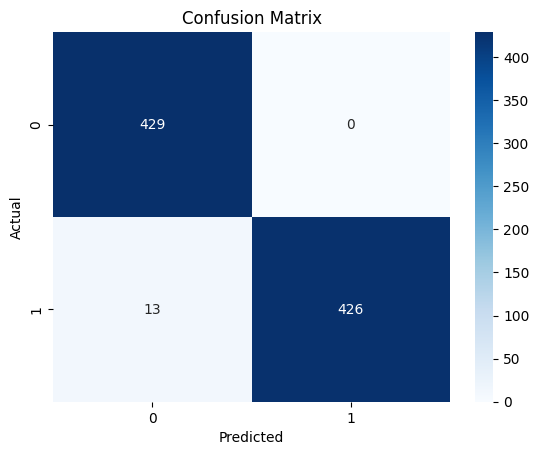

             Feature  Importance
1         TotalSpent    0.575407
0      TotalQuantity    0.286938
2  PurchaseFrequency    0.137655
Model saved successfully!


In [3]:
# ===============================
# STEP 1: IMPORT REQUIRED LIBRARIES
# ===============================

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# ===============================
# STEP 2: LOAD DATASET (NO LOGIN REQUIRED)
# ===============================

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
data = pd.read_excel(url)

# ===============================
# STEP 3: DATA UNDERSTANDING
# ===============================

print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

# ===============================
# STEP 4: DATA CLEANING
# ===============================

data = data.dropna()
data = data[data['Quantity'] > 0]
data = data[data['UnitPrice'] > 0]

# ===============================
# STEP 5: FEATURE ENGINEERING
# ===============================

data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

customer_data = data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()

customer_data.columns = [
    'CustomerID',
    'TotalQuantity',
    'TotalSpent',
    'PurchaseFrequency'
]

print(customer_data.head())

# ===============================
# STEP 6: TARGET VARIABLE CREATION
# ===============================

customer_data['HighValueCustomer'] = np.where(
    customer_data['TotalSpent'] > customer_data['TotalSpent'].median(), 1, 0
)

# ===============================
# STEP 7: FEATURE SCALING
# ===============================

X = customer_data[['TotalQuantity', 'TotalSpent', 'PurchaseFrequency']]
y = customer_data['HighValueCustomer']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# STEP 8: TRAIN-TEST SPLIT
# ===============================

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ===============================
# STEP 9: BUILD NEURAL NETWORK (MLP)
# ===============================

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ===============================
# STEP 10: TRAIN THE MODEL
# ===============================

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2
)

# ===============================
# STEP 11: MODEL EVALUATION
# ===============================

y_pred = (model.predict(X_test) > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ===============================
# STEP 12: CONFUSION MATRIX
# ===============================

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ===============================
# STEP 13: FEATURE IMPORTANCE (JUSTIFICATION)
# ===============================

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)

# ===============================
# STEP 14: SAVE MODEL
# ===============================

model.save("customer_buying_behaviour_model.h5")

print("Model saved successfully!")
